Data loaded successfully!
        "meanfreq"         "sd"     "median"        "Q25"        "Q75"  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

             "IQR"       "skew"       "kurt"     "sp.ent"        "sfm"  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0

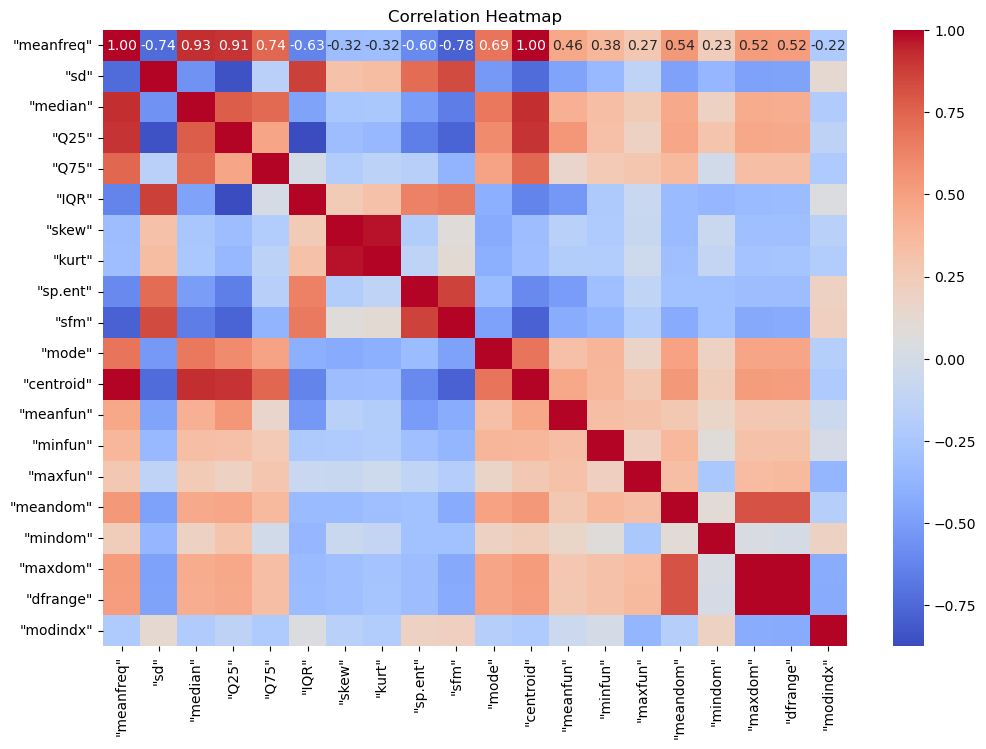

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

# Try to load the dataset with error handling
try:
    df = pd.read_csv(r"C:\Users\jeeva\OneDrive\Documents\Haasi\HACKATHON\jupyter\voice.csv", 
                     sep=',', 
                     encoding='utf-8', 
                     on_bad_lines='skip',  # Requires pandas >= 1.3.0
                     quoting=csv.QUOTE_NONE)
    print("Data loaded successfully!")

except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error: There was a problem parsing the CSV file. Check for unbalanced quotes or incorrect delimiters.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# If df was successfully loaded, perform analysis
if 'df' in locals():
    # Display summary statistics
    print(df.describe())

    # Show first 10 rows
    print(df.head(10))

    # Count of each class in 'label' column
    if 'label' in df.columns:
        print(df['label'].value_counts())

        # Visualize the distribution of the 'label' column
        plt.figure(figsize=(10, 6))
        sns.countplot(x='label', data=df)
        plt.title('Distribution of Classes in Label')
        plt.xlabel('Label')
        plt.ylabel('Count')
        plt.show()
    else:
        print("Warning: 'label' column not found in the dataset.")

    # Display last 5 rows
    print(df.tail())

    # Total number of data points
    print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

    # Check for missing values
    print("Missing values per column:\n", df.isna().sum())

    # Display correlation heatmap
    plt.figure(figsize=(12, 8))
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

